In [ ]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initial Data Preparation

### Pick a real-world directed network dataset (with number of nodes > 100)

In [ ]:
# # The dataset used is Wikipedia vote network from the link https://snap.stanford.edu/data/wiki-Vote.html
# # Dataset statistics as per the source of the data:
# Dataset statistics
# Nodes:7115
# Edges:103689
# Nodes in largest WCC:7066 (0.993)
# Edges in largest WCC:103663 (1.000)
# Nodes in largest SCC:1300 (0.183)
# Edges in largest SCC:39456 (0.381)
# Average clustering coefficient:0.1409
# Number of triangles:608389
# Fraction of closed triangles:0.04564
# Diameter (longest shortest path):7
# 90-percentile effective diameter:3.8

In [ ]:
#Load the dataset into memory
df=pd.read_excel(r"/content/Wiki-Vote.xlsx")
df

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


In [ ]:
# The number of rows in the dataframe correspond to the number of edges as per the given statistics. 
# number of connections/edges
df.shape[0] 

103689

In [ ]:
#finding unique values in dataframe
def find_unique_df(df, column):
    unique_element = []
    for index, row in df.iterrows():
        value = row[column]
        if value not in unique_element:
            unique_element.append(value)
    return unique_element

In [ ]:
# finding unique FromNodeId and ToNodeId
FromNodeId = find_unique_df(df,'FromNodeId')
ToNodeId = find_unique_df(df, 'ToNodeId')

In [ ]:
len(FromNodeId), len(ToNodeId)

(6110, 2381)

In [ ]:
# concatenating FromNodeId and ToNodeId to find complete set of nodes
nodes = np.concatenate((FromNodeId, ToNodeId))

In [ ]:
# creating duplicate columns for FromNodeId and ToNodeId 
df['FromNodeId1'] = df['FromNodeId']
df['ToNodeId1'] = df['ToNodeId']

In [ ]:
#finding unique values in array
def find_unique_arr(arr):
    unique_element = []
    for value in arr:
        if value not in unique_element:
            unique_element.append(value)
    return unique_element

In [ ]:
min(df['FromNodeId']), min(df['ToNodeId']), max(df['FromNodeId']),max(df['ToNodeId'])

(3, 3, 8274, 8297)

In [ ]:
# For a total of 7115 nodes in the dataset, the node IDs range from 3 to 8297. Therefore, some nodesare not represented in 
# the data and so we will be creating new ids for the source and the target ranging from 0 to 7114.

# creating a dictionary to assign unique id to each node 
unique_nodes = find_unique_arr(nodes)
# sorted_unique_nodes = sorted(unique_nodes)
for i in nodes:
    val_dict = {value:idx for idx, value in enumerate(unique_nodes)}

In [ ]:
val_dict

{30: 0,
 3: 1,
 25: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 54: 24,
 28: 25,
 33: 26,
 34: 27,
 36: 28,
 35: 29,
 37: 30,
 38: 31,
 39: 32,
 40: 33,
 26: 34,
 41: 35,
 42: 36,
 43: 37,
 44: 38,
 45: 39,
 46: 40,
 47: 41,
 48: 42,
 49: 43,
 50: 44,
 51: 45,
 52: 46,
 53: 47,
 29: 48,
 55: 49,
 56: 50,
 57: 51,
 58: 52,
 59: 53,
 60: 54,
 62: 55,
 27: 56,
 63: 57,
 64: 58,
 65: 59,
 66: 60,
 72: 61,
 73: 62,
 75: 63,
 76: 64,
 78: 65,
 79: 66,
 77: 67,
 80: 68,
 81: 69,
 83: 70,
 91: 71,
 67: 72,
 84: 73,
 85: 74,
 86: 75,
 71: 76,
 87: 77,
 88: 78,
 89: 79,
 90: 80,
 93: 81,
 92: 82,
 82: 83,
 94: 84,
 95: 85,
 99: 86,
 96: 87,
 100: 88,
 98: 89,
 31: 90,
 102: 91,
 103: 92,
 115: 93,
 116: 94,
 104: 95,
 105: 96,
 106: 97,
 68: 98,
 117: 99,
 118: 100,
 119: 101,
 107: 102,
 108: 103,
 109: 104,
 110: 105,
 111: 106,
 120: 107,
 112: 108,
 121: 109

In [ ]:
# Mapping the newly assigned ids to the earlier given node ids in the network
df['FromNodeId1'] = df['FromNodeId'].map(val_dict)
df['ToNodeId1'] = df['ToNodeId'].map(val_dict)

# Question 1 : Link Analysis

## Represent the network in terms of its adjacency matrix as well as edge list.

In [ ]:
# Finding the total number of nodes
n_nodes = 0
all_nodes = find_unique_arr(nodes)
for i in all_nodes:
    n_nodes=n_nodes+1
print(n_nodes)

# Create a matrix of shape n_nodes x n_nodes filled with 0s
ad_matrix = np.zeros((n_nodes, n_nodes))

7115


### Printing the adjacency matrix

In [ ]:
for i in range(0, df.shape[0]):
    source = df.loc[i]['FromNodeId1']
    target = df.loc[i]['ToNodeId1']
    ad_matrix[source][target] = 1  

print(ad_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Printing the edge list

In [ ]:
edge_list = df[['FromNodeId1', 'ToNodeId1']].values.tolist()
print(edge_list)

[[0, 6110], [0, 2716], [0, 4124], [0, 4314], [0, 6111], [1, 25], [1, 0], [1, 32], [1, 24], [1, 103], [1, 137], [1, 159], [1, 163], [1, 6112], [1, 6113], [1, 6114], [1, 6115], [1, 302], [1, 305], [1, 322], [1, 463], [1, 6116], [1, 479], [1, 481], [1, 484], [1, 496], [1, 6117], [1, 6118], [2, 1], [2, 5], [2, 7], [2, 18], [2, 22], [2, 25], [2, 48], [2, 0], [2, 26], [2, 29], [2, 44], [2, 24], [2, 49], [2, 63], [2, 68], [2, 75], [2, 84], [2, 117], [2, 137], [2, 139], [2, 163], [2, 188], [2, 6112], [2, 197], [2, 199], [2, 207], [2, 6119], [2, 224], [2, 221], [2, 226], [2, 6113], [2, 238], [2, 243], [2, 244], [2, 6114], [2, 6120], [2, 6115], [2, 261], [2, 265], [2, 267], [2, 270], [2, 6121], [2, 354], [2, 296], [2, 302], [2, 305], [2, 306], [2, 6122], [2, 314], [2, 6123], [2, 322], [2, 6124], [2, 6125], [2, 6126], [2, 346], [2, 352], [2, 6127], [2, 6128], [2, 371], [2, 404], [2, 6129], [2, 441], [2, 447], [2, 450], [2, 484], [2, 485], [2, 495], [2, 496], [2, 6117], [2, 530], [2, 532], [2, 540

## Briefly describe the dataset chosen and report the following:

In [ ]:
# Wikipedia is a free encyclopedia written collaboratively by volunteers around the world. A small part of Wikipedia 
# contributors are administrators, who are users with access to additional technical features that aid in maintenance. 
# In order for a user to become an administrator a Request for adminship (RfA) is issued and the Wikipedia community via 
# a public discussion or a vote decides who to promote to adminship. Using the latest complete dump of Wikipedia page edit 
# history (from January 3 2008) we extracted all administrator elections and vote history data. This gave us 2,794 elections
# with 103,663 total votes and 7,066 users participating in the elections (either casting a vote or being voted on). Out of
# these 1,235 elections resulted in a successful promotion, while 1,559 elections did not result in the promotion. About half 
# of the votes in the dataset are by existing admins, while the other half comes from ordinary Wikipedia users.

# The network contains all the Wikipedia voting data from the inception of Wikipedia till January 2008. Nodes in the network 
# represent wikipedia users and a directed edge from node i to node j represents that user i voted on user j.

### 1. Number of Nodes

In [ ]:
n_nodes = 0
all_nodes = find_unique_arr(nodes) # listing unique nodes
for i in all_nodes:
    n_nodes=n_nodes+1

print(n_nodes)

7115


### 2. Number of Edges

In [ ]:
n_edges = 0
for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if ad_matrix[i][j] !=0:
            n_edges = n_edges + 1
print(n_edges)        

103689


### 3. Avg In-degree

In [ ]:
#calculating the cumulative in-degree for all the nodes

In_Degree = np.zeros((n_nodes))
for j in range(0, n_nodes):
    for i in range(0, n_nodes):
        if ad_matrix[i][j] !=0:
            In_Degree[j] = In_Degree[j]+1
            
In_Degree = In_Degree.astype(int)
In_Degree

array([23, 31,  0, ...,  1,  2,  1])

In [ ]:
#Finding the average in-degree per node
# average_in_degree = sum of the in-degrees of all nodes / total nodes

total_in_degree = 0
for j in range(n_nodes):
    total_in_degree = total_in_degree + In_Degree[j]
avg_in_degree = total_in_degree/n_nodes
avg_in_degree

14.573295853829936

### 4. Avg. Out-Degree

In [ ]:
#calculating the cumulative out-degree for all the nodes

Out_Degree = np.zeros((n_nodes))
for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if ad_matrix[i][j] !=0:
            Out_Degree[i] = Out_Degree[i]+1

Out_Degree = Out_Degree.astype(int)
Out_Degree

array([ 5, 23, 90, ...,  0,  0,  0])

In [ ]:
#Finding the average out-degree per node
# average_out_degree = sum of the out-degrees of all nodes / total nodes

total_out_degree = 0
for i in range(n_nodes):
    total_out_degree = total_out_degree + Out_Degree[i]
avg_out_degree = total_out_degree/n_nodes
avg_out_degree

14.573295853829936

### 5. Node with Max In-degree

In [ ]:
#reversing the dictionary formed earlier 
inv_map = {v: k for k, v in val_dict.items()}

In [ ]:
# Initializing the max in-degree as 0
node_max_in_deg = -1
max_in_deg = 0
for i in range(n_nodes):
    if In_Degree[i]>= max_in_deg:
        max_in_deg = In_Degree[i]
        node_max_in_deg = i
        
# printing the new node id for the node with max in-degree  
print(node_max_in_deg, max_in_deg)

3230 457


In [ ]:
#inverse mapping to get the original node id to find the node with max in-degree
print(inv_map[node_max_in_deg],  max_in_deg)

4037 457


### 6. Node with Max out-degree

In [ ]:
# Initializing the max out-degree as 0
node_max_out_deg = -1
max_out_deg = 0
for i in range(n_nodes):
    if Out_Degree[i]>= max_out_deg:
        max_out_deg = Out_Degree[i]
        node_max_out_deg = i
        
# printing the new node id for the node with max out-degree  
print(node_max_out_deg, max_out_deg)

2085 893


In [ ]:
#inverse mapping to get the original node id to find the node with max out-degree
print(inv_map[node_max_out_deg], max_out_deg)

2565 893


### 7. The density of the network

In [ ]:
# the network density represents the fraction of total number of edges present in the network to the number of edges possible.
# network_density=no_of_edges/(no_of_nodes x (no_of_nodes-1))

network_density = n_edges/(n_nodes*(n_nodes-1))
network_density

0.0020485375110809584

# Further tasks to be performed:

### Question 1. Plot degree distribution of the network (in case of a directed graph, plot in-degree and out-degree separately).

In [ ]:
# Function to return unique values and their corresponding counts in an array
def find_unique_counts_arr(arr):
    unique_element = []
    for value in arr:
        found = False
        for item in unique_element:
            if item[0] == value:
                item[1] += 1
                found = True
                break
        if not found:
            unique_element.append([value, 1])
    return unique_element

In [ ]:
# creating dataframe with in-degree and out-degrees of nodes with their corresponding frequencies
a = np.array(find_unique_counts_arr(In_Degree))
df_indegree = pd.DataFrame(a)
b = np.array(find_unique_counts_arr(Out_Degree))
df_outdegree = pd.DataFrame(b)

# naming columns of the dataframe
df_indegree.columns = ['Indegree', 'freq']
df_outdegree.columns = ['Outdegree', 'freq']

In [ ]:
#sorting the dataframe by Indegree and Outdegree values in increasing order
df_indegree_sorted = df_indegree.sort_values(by='Indegree', ascending=False)
df_outdegree_sorted = df_outdegree.sort_values(by='Outdegree', ascending=False)

In [ ]:
# The highest frequency vs the indegree at which it occurs
df_indegree_sorted_new = df_indegree.sort_values(by='freq', ascending=False)
df_indegree_sorted_new

,Indegree,freq
2,0,4734
36,1,78
86,5,54
64,3,51
46,2,45
...,...,...
152,191,1
155,132,1
157,148,1
158,457,1


Text(0, 0.5, 'Frequency')

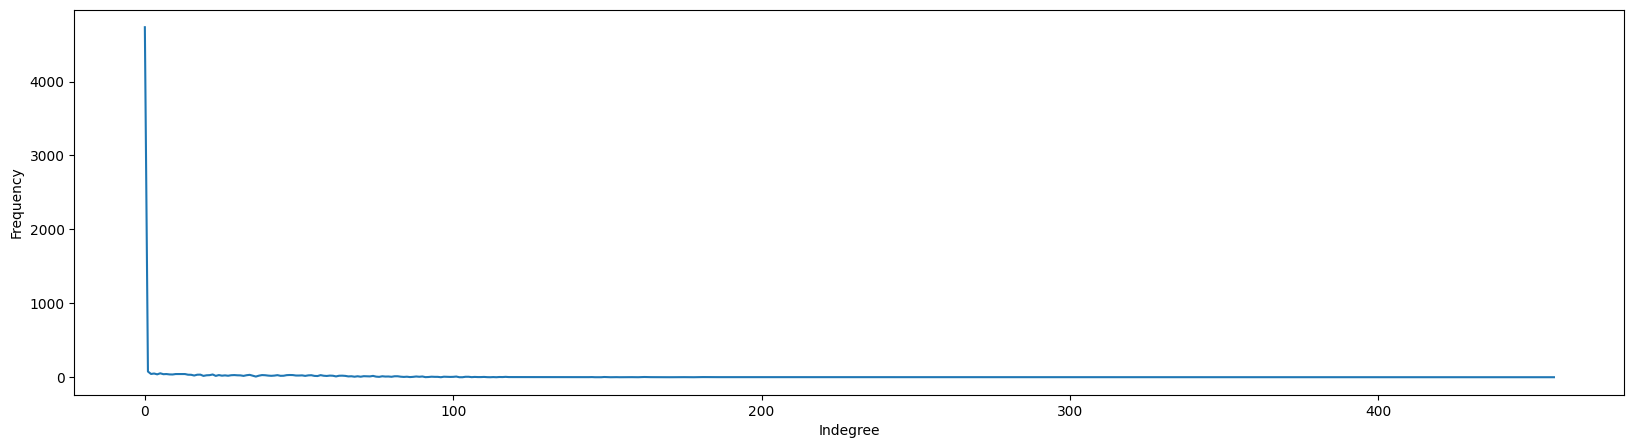

In [ ]:
# Plotting in-degree distribution
plt.figure(figsize=(20,5))
plt.plot(df_indegree_sorted['Indegree'], df_indegree_sorted['freq'])
plt.xlabel('Indegree')
plt.ylabel('Frequency')

In [ ]:
# The highest frequency vs the outdegree at which it occurs
df_outdegree_sorted_new = df_outdegree.sort_values(by='freq', ascending=False)
df_outdegree_sorted_new

,Outdegree,freq
38,1,2382
237,0,1005
20,2,704
58,3,401
32,4,279
...,...,...
147,599,1
145,472,1
142,399,1
139,305,1


Text(0, 0.5, 'Frequency')

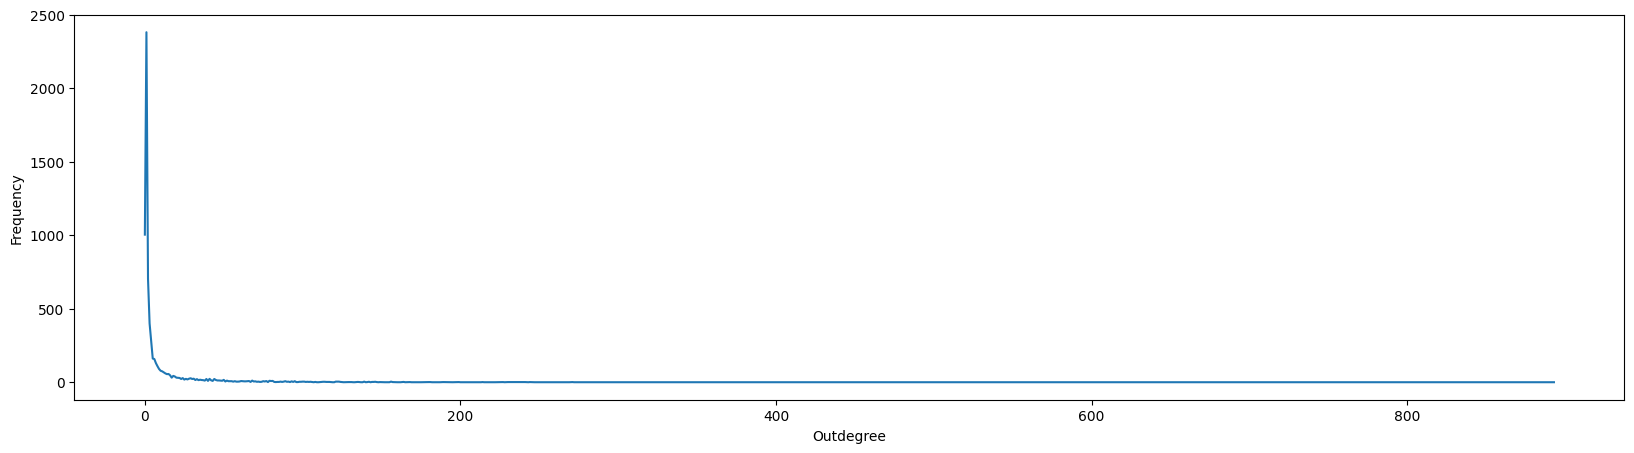

In [ ]:
# Plotting out-degree distribution
plt.figure(figsize=(20,5))
plt.plot(df_outdegree_sorted['Outdegree'], df_outdegree_sorted['freq'])
plt.xlabel('Outdegree')
plt.ylabel('Frequency')

### Question 2. Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution (lcc vs frequency of lcc) of the network.

In [ ]:
#  local clustering coefficient for node i can be calculated as :
# C(i)  = |{e(jk) : v(j), v(k) ∈ N(i), e(jk)∈ E}|/(deg(i) * (deg(i) - 1))

#function to calculate local clustering coefficient for a node

def local_clustering_coefficient(adj_matrix, node):
    
# The neighbors of the input node can be calculated by finding all non-zero entries in the row of the adjacency matrix 
# corresponding to that node.    
    
    neighbors = np.where(adj_matrix[node, :] == 1)[0]
    
# local clustering coefficient for nodes with 0 or 1 neighbor is 0.0

    if len(neighbors) <= 1:
        return 0.0
    
    num_triangles = 0
    
#  counting the number of triangles that involve the given node
    
    for neighbor in neighbors:
        
#  neighbor_of_neighbor are neighboring nodes of the nodes that are present in the neighbours node set

        for neighbor_of_neighbor in np.where(adj_matrix[neighbor, :] == 1)[0]:
            if neighbor_of_neighbor in neighbors:
                num_triangles += 1
    return num_triangles / (len(neighbors) * (len(neighbors) - 1))

#initializing array local_clustering_coeff with 0s

local_clustering_coeff = np.zeros((n_nodes))

#calling function to calculate local_clustering_coefficient for each node

for node in range(ad_matrix.shape[0]):
    print(f"Local clustering coefficient of node {inv_map[node]}: {local_clustering_coefficient(ad_matrix, node)}")
    local_clustering_coeff[node] = local_clustering_coefficient(ad_matrix, node)
    

Streaming output truncated to the last 5000 lines.
Local clustering coefficient of node 2609: 0.047619047619047616
Local clustering coefficient of node 2610: 0.0
Local clustering coefficient of node 2611: 0.19047619047619047
Local clustering coefficient of node 2612: 0.1022167487684729
Local clustering coefficient of node 2613: 0.13166666666666665
Local clustering coefficient of node 2614: 0.0
Local clustering coefficient of node 2615: 0.0
Local clustering coefficient of node 2616: 0.0
Local clustering coefficient of node 2617: 0.05411255411255411
Local clustering coefficient of node 2618: 0.1683599419448476
Local clustering coefficient of node 2623: 0.032537210107303566
Local clustering coefficient of node 2619: 0.1111111111111111
Local clustering coefficient of node 2620: 0.06884057971014493
Local clustering coefficient of node 2627: 0.0
Local clustering coefficient of node 2626: 0.3333333333333333
Local clustering coefficient of node 2630: 0.0
Local clustering coefficient of node 26

### Plotting clustering-coefficient distribution

In [ ]:
# creating dataframe with local_clustering_coeff values vs their corresponding frequencies

coeff_freq = np.array(find_unique_counts_arr(local_clustering_coeff))
df_local_clustering_coeff = pd.DataFrame(coeff_freq)

df_local_clustering_coeff.columns = ['local_clustering_coeff', 'freq']
df_local_clustering_coeff_sorted = df_local_clustering_coeff.sort_values(by='local_clustering_coeff', ascending=False)


In [ ]:
# The highest frequency vs the local_clustering_coeff at which it occurs
df_local_clustering_coeff_new = df_local_clustering_coeff.sort_values(by='freq', ascending=False)
df_local_clustering_coeff_new

,local_clustering_coeff,freq
21,0.000000,4297.0
112,0.166667,184.0
55,0.500000,177.0
36,0.083333,80.0
78,0.333333,79.0
...,...,...
521,0.046612,1.0
522,0.118976,1.0
524,0.042942,1.0
525,0.068493,1.0


Text(0, 0.5, 'Frequency')

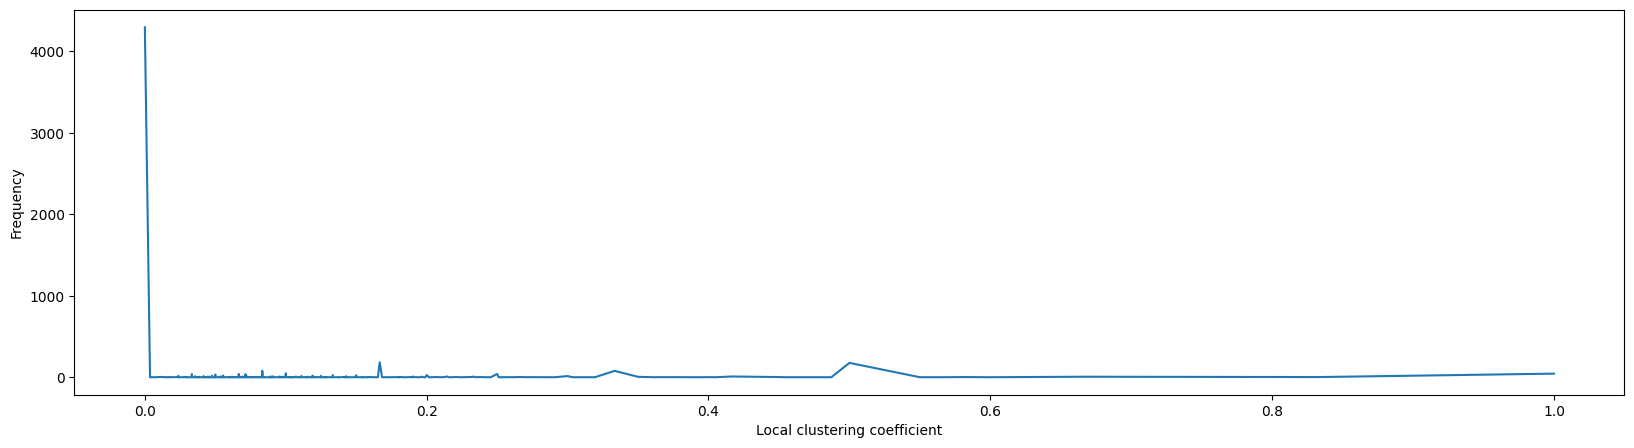

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_local_clustering_coeff_sorted['local_clustering_coeff'], df_local_clustering_coeff_sorted['freq'])
plt.xlabel('Local clustering coefficient')
plt.ylabel('Frequency')